In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense ,Dropout, Flatten
from tensorflow.keras.layers import Input
#import matplotlib.pyplot as plt

In [2]:
count = 0 
dirs = os.listdir('English_fonts/')
for dir in dirs:
    files = list(os.listdir('English_fonts/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'English_fonts')
    count = count + len(files)
print( 'Images Folder has total '+ str(count) + 'English_fonts')

0 Folder has 1017English_fonts
1 Folder has 993English_fonts
2 Folder has 1004English_fonts
3 Folder has 1004English_fonts
4 Folder has 988English_fonts
5 Folder has 1000English_fonts
6 Folder has 999English_fonts
7 Folder has 1000English_fonts
8 Folder has 1012English_fonts
9 Folder has 1012English_fonts
A Folder has 1978English_fonts
B Folder has 1966English_fonts
C Folder has 1927English_fonts
D Folder has 1969English_fonts
E Folder has 1922English_fonts
F Folder has 1909English_fonts
G Folder has 1900English_fonts
H Folder has 30English_fonts
I Folder has 1978English_fonts
J Folder has 1921English_fonts
K Folder has 2015English_fonts
L Folder has 1878English_fonts
M Folder has 1954English_fonts
N Folder has 1948English_fonts
O Folder has 2027English_fonts
P Folder has 2008English_fonts
Q Folder has 1881English_fonts
R Folder has 1936English_fonts
S Folder has 1984English_fonts
T Folder has 1910English_fonts
U Folder has 1869English_fonts
V Folder has 1954English_fonts
W Folder has 

In [3]:
base_dir = 'English_fonts'
# img_size = 128
batch = 32

In [4]:
base_dir="English_fonts/"
training_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(128,128),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='training',
                                                             batch_size=32)

Found 58439 files belonging to 36 classes.
Using 46752 files for training.


In [5]:
validation_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(128,128),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='validation',
                                                              batch_size=32)

Found 58439 files belonging to 36 classes.
Using 11687 files for validation.


In [6]:
Character_names= training_dataset.class_names
Character_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [7]:
import matplotlib.pyplot as plt


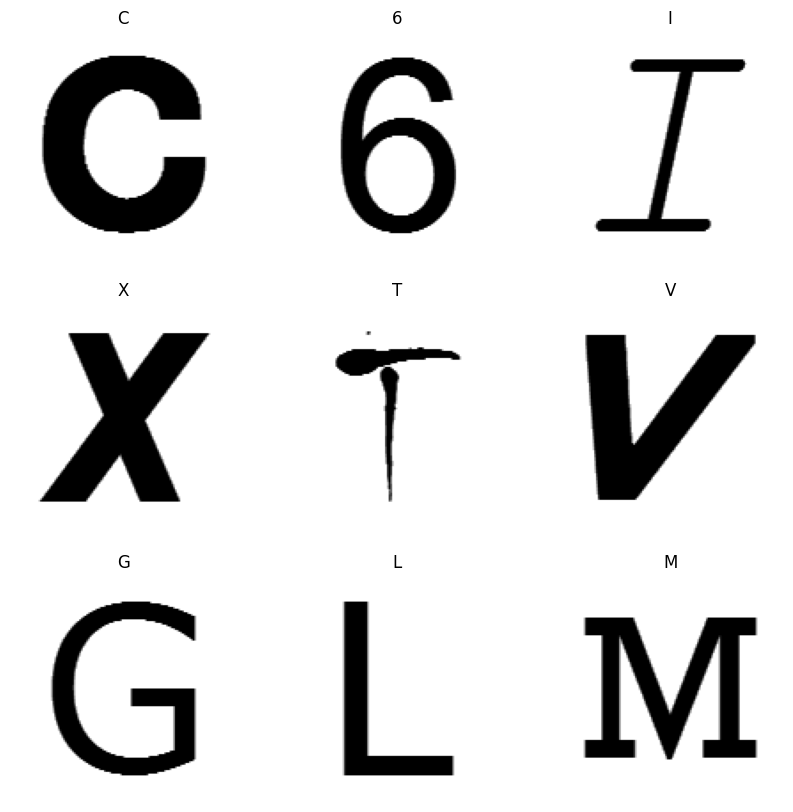

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Character_names[labels[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
validation_dataset = validation_dataset.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
data_augmentation=Sequential([
    Input(shape=(128,128,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)    
    
])

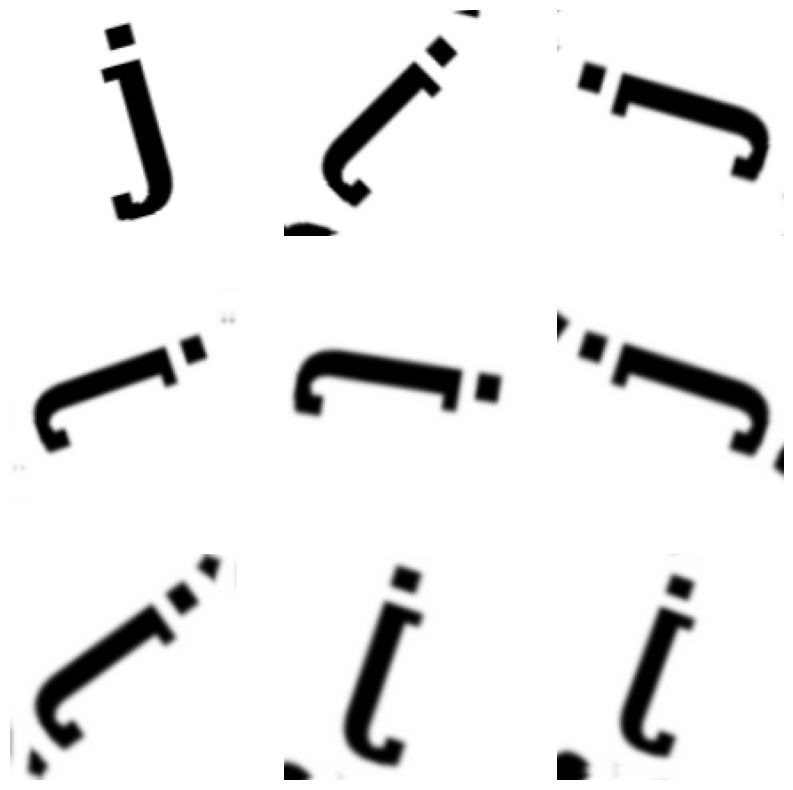

In [13]:
i=0
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        images=data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis("off")

In [14]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(62)
    
])
model.build(input_shape=(None, 128, 128, 3))

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,128,862 (8.12 MB)

 Trainable params: 2,128,862 (8.12 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history =model.fit(training_dataset,epochs=12,validation_data=validation_dataset)

Epoch 1/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 648s 418ms/step - accuracy: 0.5077 - loss: 1.7883 - val_accuracy: 0.8431 - val_loss: 0.5330
Epoch 2/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 672s 460ms/step - accuracy: 0.8319 - loss: 0.5779 - val_accuracy: 0.8900 - val_loss: 0.3468
Epoch 3/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 479s 328ms/step - accuracy: 0.8707 - loss: 0.4353 - val_accuracy: 0.8945 - val_loss: 0.3436
Epoch 4/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 431s 295ms/step - accuracy: 0.8854 - loss: 0.3634 - val_accuracy: 0.9232 - val_loss: 0.2375
Epoch 5/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 441s 302ms/step - accuracy: 0.9021 - loss: 0.3209 - val_accuracy: 0.9335 - val_loss: 0.2164
Epoch 6/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 453s 310ms/step - accuracy: 0.9087 - loss: 0.2937 - val_accuracy: 0.9321 - val_loss: 0.2229
Epoch 7/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 439s 301ms/step - accuracy: 0.9136 - loss: 0.2682 - val_accuracy: 0.9369 - val_loss: 0.2013
Epoch 8/12
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 444s 304ms/step - ac

In [18]:
accuracy=model.evaluate(training_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

1461/1461 ━━━━━━━━━━━━━━━━━━━━ 166s 114ms/step - accuracy: 0.9553 - loss: 0.1362
compile_metrics: 95.542437%


In [19]:
accuracy=model.evaluate(validation_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

366/366 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step - accuracy: 0.9456 - loss: 0.1569
compile_metrics: 94.848979%


In [20]:
model.save('Character_Recognition.keras')